In [27]:
import sys
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Activation
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras import callbacks
import time

In [2]:
epochs = 20

## Dataset import

In [3]:
train_data_path = 'dataset/train'
validation_data_path = 'dataset/test'

In [12]:
img_width, img_height = 150, 150
batch_size = 32
samples_per_epoch = 400
validation_steps = 300
nb_filters1 = 32
nb_filters2 = 64
conv1_size = 3
conv2_size = 2
pool_size = 2
classes_num = 4
lr = 0.0004

## The neural network

In [13]:
model = Sequential()
model.add(Convolution2D(nb_filters1, conv1_size, conv1_size, border_mode ="same", input_shape=(img_width, img_height, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(Convolution2D(nb_filters2, conv2_size, conv2_size, border_mode ="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size), dim_ordering='th'))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(classes_num, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=lr),
              metrics=['accuracy'])

/home/costa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(150, 150,..., padding="same")`
  
/home/costa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (2, 2), padding="same")`
  
/home/costa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_first")`
  


In [14]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 7421 images belonging to 4 classes.
Found 400 images belonging to 4 classes.


In [15]:
log_dir = 'logs/'
tb_cb = callbacks.TensorBoard(log_dir=log_dir, histogram_freq=0)
cbks = [tb_cb]

## Training the model

In [16]:
model.fit_generator(
    train_generator,
    samples_per_epoch=samples_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=cbks,
    validation_steps=validation_steps)

/home/costa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., epochs=20, validation_data=<keras_pre..., callbacks=[<keras.ca..., validation_steps=300, steps_per_epoch=12)`
  import sys


Epoch 1/20
12/12 [==============================] - 44s 4s/step - loss: 4.6230 - acc: 0.2734 - val_loss: 1.0785 - val_acc: 0.5026
Epoch 2/20
12/12 [==============================] - 16s 1s/step - loss: 1.0572 - acc: 0.5469 - val_loss: 0.7734 - val_acc: 0.5930
Epoch 3/20
12/12 [==============================] - 16s 1s/step - loss: 0.8544 - acc: 0.6146 - val_loss: 0.8628 - val_acc: 0.5732
Epoch 4/20
12/12 [==============================] - 17s 1s/step - loss: 0.8178 - acc: 0.6406 - val_loss: 0.7106 - val_acc: 0.6516
Epoch 5/20
12/12 [==============================] - 16s 1s/step - loss: 0.7901 - acc: 0.6224 - val_loss: 0.7297 - val_acc: 0.6481
Epoch 6/20
12/12 [==============================] - 17s 1s/step - loss: 0.7317 - acc: 0.6953 - val_loss: 0.6134 - val_acc: 0.6787
Epoch 7/20
12/12 [==============================] - 16s 1s/step - loss: 0.7008 - acc: 0.6719 - val_loss: 0.6832 - val_acc: 0.6998
Epoch 8/20
12/12 [==============================] - 15s 1s/step - loss: 0.6994 - acc: 0.73

In [17]:
model.save('models/model.h5')
model.save_weights('models/weights.h5')

## Testing the saved model

In [19]:
from keras.models import Sequential, load_model


model_path = 'models/model.h5'
model = load_model(model_path)

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def predict(file):
  img=mpimg.imread(file)
  imgplot = plt.imshow(img)
  plt.show()
  x = load_img(file, target_size=(img_width,img_height))
  x = img_to_array(x)
  x = np.expand_dims(x, axis=0)
  array = model.predict(x)
  result = array[0]
#   print(result)
  answer = np.argmax(result)
  if answer == 0:
    print("Predicted: broadleaf")
  elif answer == 1:
    print("Predicted: grass")
  elif answer == 2:
    print("Predicted: Soil")
  else:
    print("Predicted: soybean")

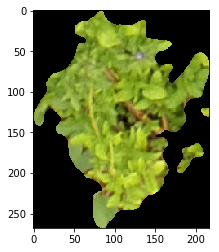

Predicted: broadleaf


In [43]:
predict('predict/23.tif')

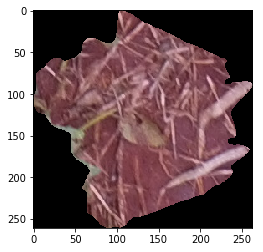

Predicted: Soil


In [44]:
predict('predict/77.tif')

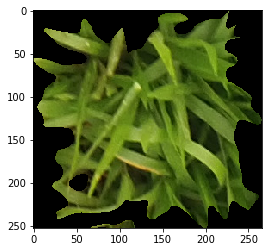

Predicted: grass


In [45]:
predict('predict/69.tif')